The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [88]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!
nobel_df = pd.read_csv("./data/nobel.csv")

In [89]:
nobel_df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [90]:
gender_counts = nobel_df["sex"].value_counts()

Male


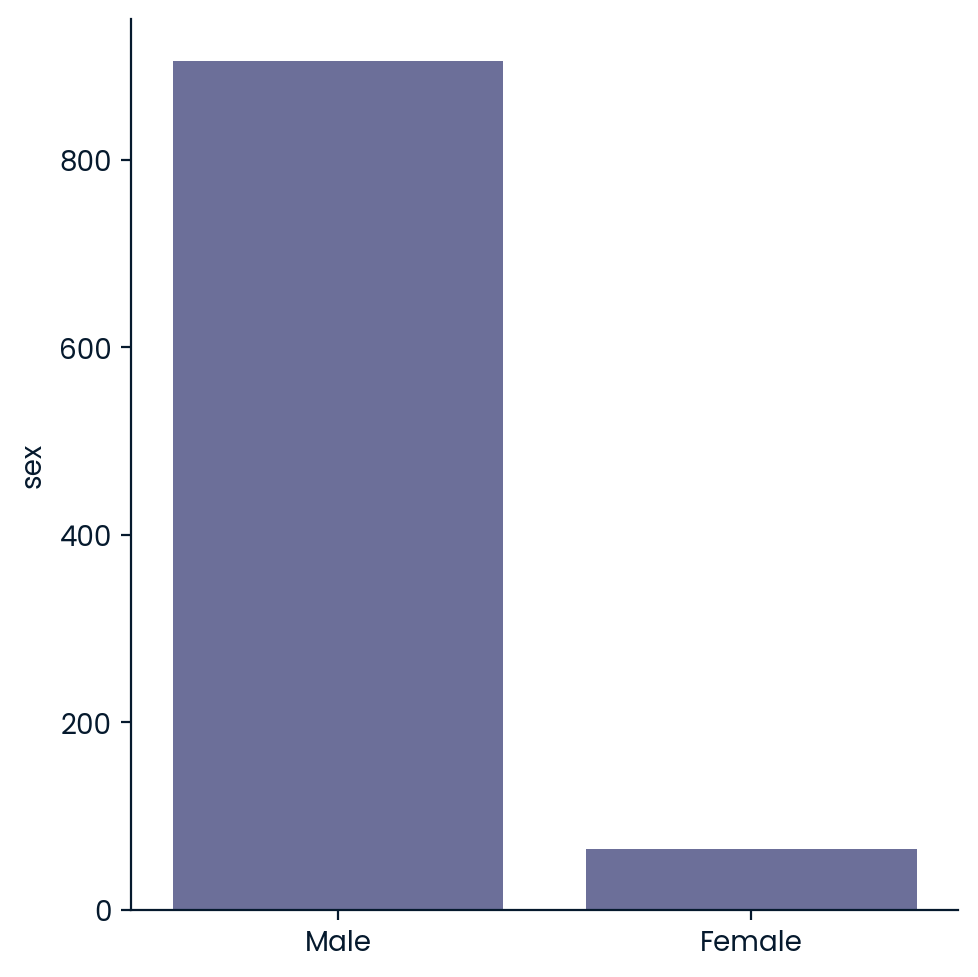

In [91]:
sns.catplot(data=gender_counts, kind="bar")

top_gender = "Male"
print(top_gender)

In [92]:
country_counts = nobel_df["birth_country"].value_counts()
print(country_counts)

top_country = "United States of America"
print(top_country)

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64
United States of America


In [93]:
nobel_df["US_born_winners"] = nobel_df["birth_country"] == "United States of America"

nobel_df["US_born_winners"]

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998    False
999     True
Name: US_born_winners, Length: 1000, dtype: bool

In [94]:
decades = (10 * (np.floor(nobel_df["year"]/10))).astype("int")

nobel_df["decade"] = decades

print(nobel_df[nobel_df["year"] == 1987])

     year    category  ... US_born_winners decade
571  1987   Chemistry  ...            True   1980
572  1987   Chemistry  ...           False   1980
573  1987   Chemistry  ...           False   1980
574  1987   Economics  ...            True   1980
575  1987  Literature  ...           False   1980
576  1987    Medicine  ...           False   1980
577  1987       Peace  ...           False   1980
578  1987     Physics  ...           False   1980
579  1987     Physics  ...           False   1980

[9 rows x 20 columns]


In [95]:
ratio = nobel_df.groupby("decade", as_index=False)["US_born_winners"].mean()

print(ratio)

    decade  US_born_winners
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.314050
12    2020         0.360000


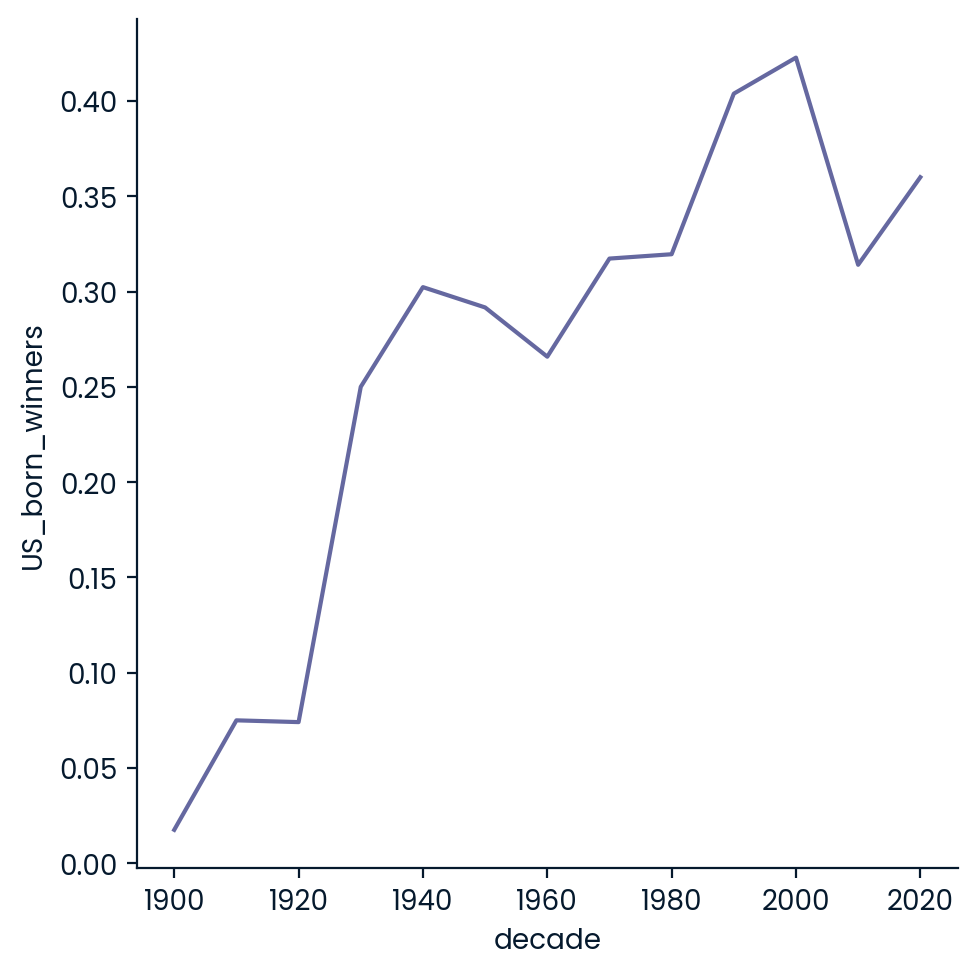

In [96]:
sns.relplot(data=ratio, kind="line", x="decade", y="US_born_winners")

max_decade_usa = 2000

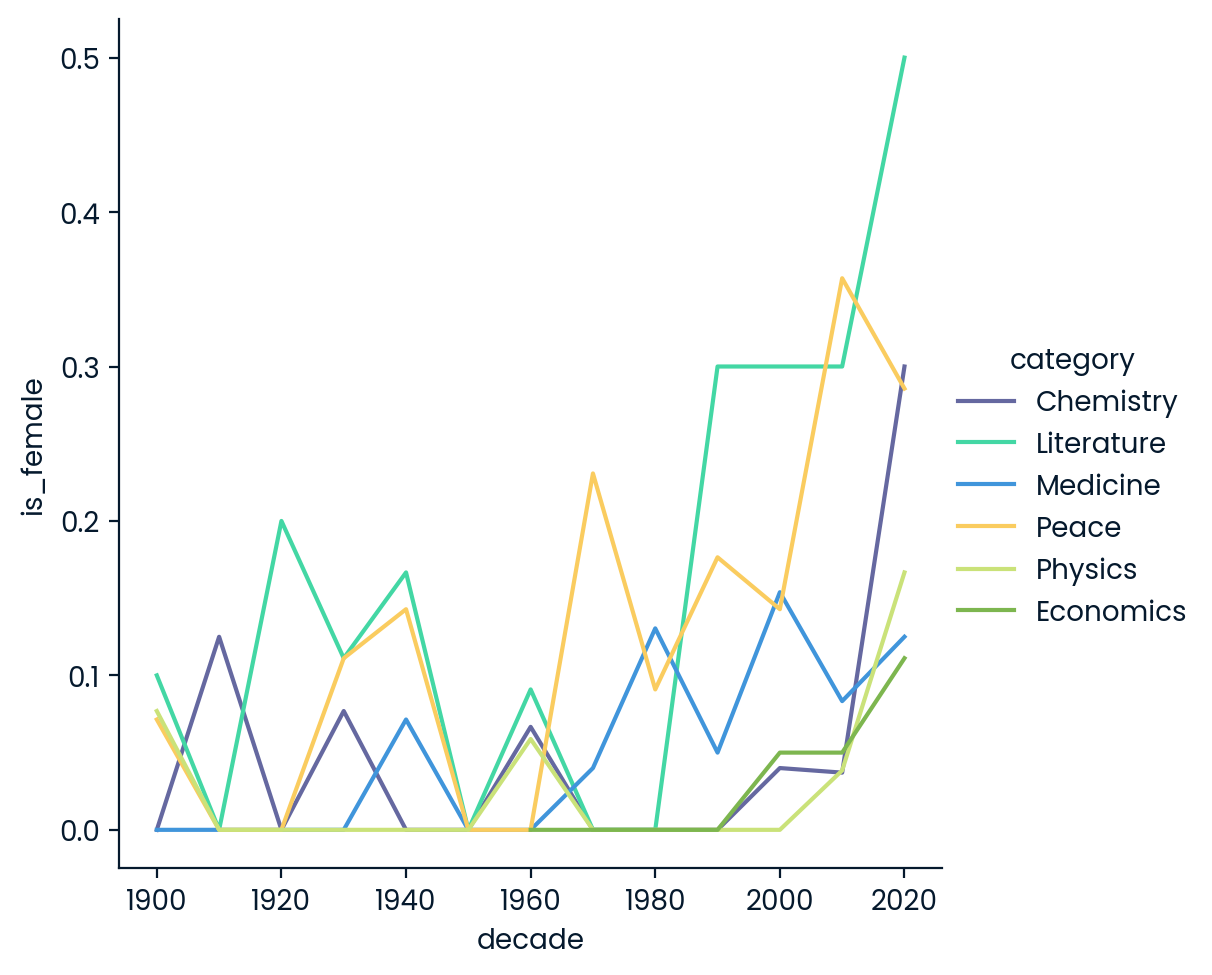

In [97]:
nobel_df["is_female"] = nobel_df["sex"] == "Female"

ratio_fl = nobel_df.groupby(["decade", "category"], as_index=False)["is_female"].mean()

sns.relplot(data=ratio_fl, kind="line", x="decade", y="is_female", hue="category")

max_female_dict = {2020:"Literature"}

In [98]:
print(nobel_df[["full_name", "category"]][nobel_df["sex"] == "Female"])

first_woman_category = "Physics"
first_woman_name = "Marie Curie, née Sklodowska"

                                             full_name    category
19                         Marie Curie, née Sklodowska     Physics
29   Baroness Bertha Sophie Felicita von Suttner, n...       Peace
51                       Selma Ottilia Lovisa Lagerlöf  Literature
62                         Marie Curie, née Sklodowska   Chemistry
128                                     Grazia Deledda  Literature
..                                                 ...         ...
982                                       Annie Ernaux  Literature
989                                     Katalin Karikó    Medicine
993                                    Anne L’Huillier     Physics
998                                   Narges Mohammadi       Peace
999                                     Claudia Goldin   Economics

[65 rows x 2 columns]


In [99]:
ind_org = nobel_df.value_counts("full_name")
ind_org = ind_org[ind_org > 1].index
repeat_list = list(ind_org)
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Frederick Sanger', 'Linus Carl Pauling', 'John Bardeen', 'Marie Curie, née Sklodowska']
